<a href="https://colab.research.google.com/github/CJL-INVEST/invest/blob/main/k_weather_all_3ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bt
!pip install finterstellar
!pip install quantstats
!pip install finance-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import bt
import finterstellar as fs
import quantstats as qs
import pandas as pd
from datetime import datetime, timedelta
import math
import FinanceDataReader as fdr
import yfinance as yf
%matplotlib inline

In [ ]:
class K_AllWeather:

    def __init__(self, start_day, end_day):
        self.start_day = start_day
        self.end_day = end_day

        # RU: Risky Universe, CU: Cash Universe
        # self.__RU = ['360750', '294400', '319640'] # invest 25% per each item and rebalance every year
        self.__RU = ['360750', '361580', '319640'] # invest 25% per each item and rebalance every year
        self.__RU_Name = ['Tiger미국S&P', 'KOSEF200TR', 'TIGER골드선물H']
        self.__CU = ['148070', '305080', '272580'] # choose one of them according to the policy and rebalance every month
        self.__CU_Name = ['KOSEF국고채10년', 'TIGER미국채10년선물','TIGER단기채권액티브']
        self.__RCU_Name = self.__RU_Name + self.__CU_Name
        self.__RU_2 = ['360200', '361580', '132030'] # invest 25% per each item and rebalance every year
        self.__RU_Name_2 = ['Kindex미국S&P', 'KBSTAR200TR', 'KODEX골드선물H']
        self.__CU_2 = ['365780', '308620', '214980'] # choose one of them according to the policy and rebalance every month
        self.__CU_Name_2 = ['KINDEX국고채10년', 'KODEX미국채10년선물','KODEX단기채권PLUS']
        self.__RCU_Name_2 = self.__RU_Name_2 + self.__CU_Name_2

        self.__SLIPPAGE = 0.015
        self.__TRANSACTION_FEE = 0.00015

        self.__df_CU = None
        self.__df_RU = None
        self.__df_RCU = None
        self.__df_RCU_MA = None

        self.__df_CU_2= None
        self.__df_RU_2 = None
        self.__df_RCU_2 = None
        self.__df_RCU_MA_2 = None

    def get_CU_data(self):
        return self.__df_CU
  
    def get_RU_data(self):
        return self.__df_RU

    def get_CU_Name(self):
        return self.__CU_Name
  
    def get_RU_Name(self):
        return self.__RU_Name

    def get_RU_Name_2(self):
        return self.__RU_Name_2

    def get_CU_Name_2(self):
        return self.__CU_Name_2

    def fetch_CU_data(self):
        self.__df_CU = pd.DataFrame(columns=self.__CU_Name)
        idx = 0
        for ticker in self.__CU:
            ticker_name = self.__CU_Name[idx]
            print(fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day))
            self.__df_CU[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_CU = self.__df_CU.dropna()

    def fetch_RU_data(self):
        self.__df_RU = pd.DataFrame(columns=self.__RU_Name)
        idx = 0
        for ticker in self.__RU:
            ticker_name = self.__RU_Name[idx]
            self.__df_RU[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_RU = self.__df_RU.dropna()

    def get_RCU_data(self):
        self.__df_RCU = pd.concat([self.__df_RU[self.__RU_Name], self.__df_CU[self.__CU_Name]], axis=1)
        self.__df_RCU = self.__df_RCU.dropna()
        return self.__df_RCU
  
    def get_RCU_data_ma(self, ma_period):
        self.__df_RCU_MA = self.__df_RCU[self.__RCU_Name].rolling(window=ma_period).mean()
        return self.__df_RCU_MA

    def get_RCU_data_ma2(self, ma_period):
        self.__df_RCU_MA_2 = self.__df_RCU_2[self.__RCU_Name_2].rolling(window=ma_period).mean()
        return self.__df_RCU_MA_2

    def get_CU2_data(self):
        return self.__df_CU_2
  
    def get_RU2_data(self):
        return self.__df_RU_2

    def fetch_CU2_data(self):
        self.__df_CU_2 = pd.DataFrame(columns=self.__CU_Name_2)
        idx = 0
        for ticker in self.__CU_2:
            ticker_name = self.__CU_Name_2[idx]
            self.__df_CU_2[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_CU_2 = self.__df_CU_2.dropna()

    def fetch_RU2_data(self):
        self.__df_RU_2 = pd.DataFrame(columns=self.__RU_Name_2)
        idx = 0
        for ticker in self.__RU_2:
            ticker_name = self.__RU_Name_2[idx]
            self.__df_RU_2[ticker_name] = fdr.DataReader(ticker, self.start_day - timedelta(days=365), self.end_day)['Close']
            idx = idx + 1
        self.__df_RU_2 = self.__df_RU_2.dropna()

    def get_RCU2_data(self):
        self.__df_RCU_2 = pd.concat([self.__df_RU_2[self.__RU_Name_2], self.__df_CU_2[self.__CU_Name_2]], axis=1)
        self.__df_RCU_2 = self.__df_RCU_2.dropna()
        return self.__df_RCU_2



In [ ]:
#if __name__ == "__main__":
MA_VALUE = 50
start_day = datetime(2000,1,1)
end_day = datetime.now()
kw = K_AllWeather(start_day, end_day)
kw.fetch_RU_data()
kw.fetch_CU_data()
kw.fetch_RU2_data()
kw.fetch_CU2_data()


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- 148070: No timezone found, symbol may be delisted
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
              Open    High     Low   Close  Volume    Change
Date                                                        
2011-10-20   83795   83904   83771   83860   43093       NaN
2011-10-21   83724   83779   83346   83487    4286 -0.004448
2011-10-24   83509   83509   83167   83199    4303 -0.003450
2011-10-25   83321   83439   83276   83363    1186  0.001971
2011-10-26   83305   83498   83221   83484   17543  0.001451
...            ...     ...     ...     ...     ...       ...
2022-12-15  111145  111185  110780  111185   15229  0.000360
2022-12-16  111500  111600  111000  111570   19397  0.003463
2022-12-19  111570  111575  111045  111300   16315 -0.002420
2022-12-20  110910  111000  108000  109465   46833 -0.016487
2022-12-21  109380  109905  108760  109560   892

In [ ]:
df_ru2 = kw.get_RU2_data()
df_ru2

,Kindex미국S&P,KBSTAR200TR,KODEX골드선물H
Date,,,
2020-08-21,9983,15340.0,13450
2020-08-24,10066,15505.0,13395
2020-08-25,10146,15705.0,13375
2020-08-26,10136,15705.0,13285
2020-08-27,10217,15575.0,13435
...,...,...,...
2022-12-15,13210,16280.0,11850
2022-12-16,12895,16205.0,11775
2022-12-19,12745,16210.0,11845


In [ ]:
df_ru = kw.get_RU_data()
df_ru


,Tiger미국S&P,KOSEF200TR,TIGER골드선물H
Date,,,
2020-08-21,9913,15340.0,14315
2020-08-24,10001,15505.0,14265
2020-08-25,10076,15705.0,14235
2020-08-26,10086,15705.0,14135
2020-08-27,10149,15575.0,14300
...,...,...,...
2022-12-15,13080,16280.0,12690
2022-12-16,12770,16205.0,12600
2022-12-19,12605,16210.0,12685


In [ ]:
df_cu = kw.get_CU_data()
df_cu


,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,
2018-08-30,111971,9985.0,48420.0
2018-08-31,112286,10050.0,48425.0
2018-09-03,112479,10025.0,48429.0
2018-09-04,112559,10055.0,48433.0
2018-09-05,112662,10100.0,48433.0
...,...,...,...
2022-12-15,111185,11645.0,51130.0
2022-12-16,111570,11675.0,51135.0
2022-12-19,111300,11655.0,51145.0


In [ ]:
df_cu2 = kw.get_CU2_data()
df_cu2

,KINDEX국고채10년,KODEX미국채10년선물,KODEX단기채권PLUS
Date,,,
2020-10-15,98778,11950,102735
2020-10-16,98551,11985,102745
2020-10-19,98655,11900,102740
2020-10-20,98999,11875,102745
2020-10-21,98414,11755,102750
...,...,...,...
2022-12-15,88630,11435,104760
2022-12-16,88930,11460,104780
2022-12-19,88710,11395,104800


In [ ]:
ru_name = kw.get_RU_Name()
ru_name

['Tiger미국S&P', 'KOSEF200TR', 'TIGER골드선물H']

Tiger미국S&P     1.000000
Kindex미국S&P    0.999951
Name: Tiger미국S&P, dtype: float64
KOSEF200TR     1.0
KBSTAR200TR    1.0
Name: KOSEF200TR, dtype: float64
TIGER골드선물H    1.000000
KODEX골드선물H    0.999036
Name: TIGER골드선물H, dtype: float64


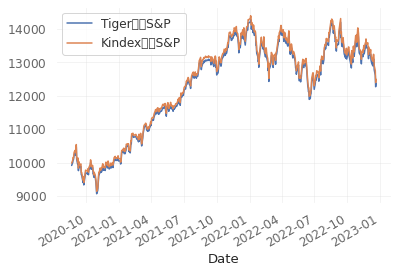

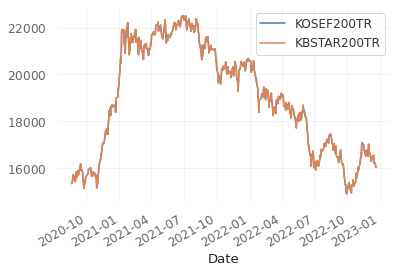

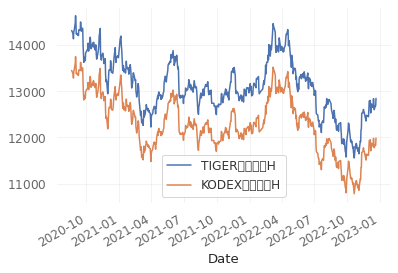

In [ ]:
ru_name = kw.get_RU_Name()
ru_name
ru_name2 = kw.get_RU_Name_2()
for idx in range(len(ru_name)):
  df_CORR = pd.concat([df_ru[ru_name[idx]],df_ru2[ru_name2[idx]]], axis=1)
  TARGET_ETF = ru_name[idx]
  corr = df_CORR.corr(method='pearson')
  top10 = corr.sort_values(by=TARGET_ETF, ascending=False).head(2)[TARGET_ETF]
  print(top10)
  print('================================')
  df_CORR.plot()

KOSEF국고채10년     1.000000
KINDEX국고채10년    0.999727
Name: KOSEF국고채10년, dtype: float64
TIGER미국채10년선물    1.000000
KODEX미국채10년선물    0.989997
Name: TIGER미국채10년선물, dtype: float64
TIGER단기채권액티브     1.000000
KODEX단기채권PLUS    0.989091
Name: TIGER단기채권액티브, dtype: float64


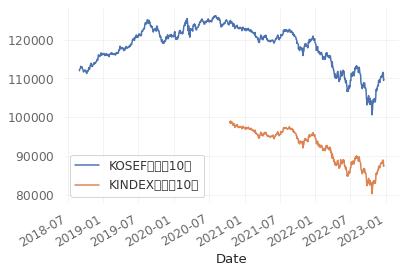

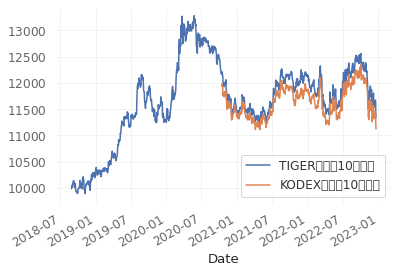

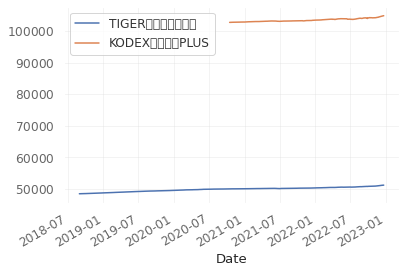

In [ ]:
cu_name = kw.get_CU_Name()
cu_name
cu_name2 = kw.get_CU_Name_2()
for idx in range(len(cu_name)):
  df_CORR2 = pd.concat([df_cu[cu_name[idx]],df_cu2[cu_name2[idx]]], axis=1)
  TARGET_ETF = cu_name[idx]
  corr = df_CORR2.corr(method='pearson')
  top10 = corr.sort_values(by=TARGET_ETF, ascending=False).head(2)[TARGET_ETF]
  print(top10)
  print('================================')
  df_CORR2.plot()

In [ ]:
top10

TIGER단기채권액티브     1.000000
KODEX단기채권PLUS    0.989091
Name: TIGER단기채권액티브, dtype: float64

In [ ]:
df_rcu2 = kw.get_RCU2_data()
df_rcu2

,Kindex미국S&P,KBSTAR200TR,KODEX골드선물H,KINDEX국고채10년,KODEX미국채10년선물,KODEX단기채권PLUS
Date,,,,,,
2020-10-15,9872,15745.0,13110,98778.0,11950.0,102735.0
2020-10-16,9925,15645.0,13135,98551.0,11985.0,102745.0
2020-10-19,9910,15680.0,13190,98655.0,11900.0,102740.0
2020-10-20,9750,15795.0,13120,98999.0,11875.0,102745.0
2020-10-21,9740,15850.0,13230,98414.0,11755.0,102750.0
...,...,...,...,...,...,...
2022-12-15,13210,16280.0,11850,88630.0,11435.0,104760.0
2022-12-16,12895,16205.0,11775,88930.0,11460.0,104780.0
2022-12-19,12745,16210.0,11845,88710.0,11395.0,104800.0


In [ ]:
df_rcu = kw.get_RCU_data()
df_rcu


,Tiger미국S&P,KOSEF200TR,TIGER골드선물H,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,,,,
2020-08-21,9913.0,15340.0,14315.0,125094,12640.0,49921.0
2020-08-24,10001.0,15505.0,14265.0,125295,12705.0,49916.0
2020-08-25,10076.0,15705.0,14235.0,125246,12640.0,49921.0
2020-08-26,10086.0,15705.0,14135.0,125098,12605.0,49921.0
2020-08-27,10149.0,15575.0,14300.0,124868,12620.0,49921.0
...,...,...,...,...,...,...
2022-12-15,13080.0,16280.0,12690.0,111185,11645.0,51130.0
2022-12-16,12770.0,16205.0,12600.0,111570,11675.0,51135.0
2022-12-19,12605.0,16210.0,12685.0,111300,11655.0,51145.0


In [ ]:
df_rcu_ma = kw.get_RCU_data_ma(MA_VALUE)

In [ ]:
df_rcu

,Tiger미국S&P,KOSEF200TR,TIGER골드선물H,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,,,,
2020-08-21,9913.0,15340.0,14315.0,125094,12640.0,49921.0
2020-08-24,10001.0,15505.0,14265.0,125295,12705.0,49916.0
2020-08-25,10076.0,15705.0,14235.0,125246,12640.0,49921.0
2020-08-26,10086.0,15705.0,14135.0,125098,12605.0,49921.0
2020-08-27,10149.0,15575.0,14300.0,124868,12620.0,49921.0
...,...,...,...,...,...,...
2022-12-15,13080.0,16280.0,12690.0,111185,11645.0,51130.0
2022-12-16,12770.0,16205.0,12600.0,111570,11675.0,51135.0
2022-12-19,12605.0,16210.0,12685.0,111300,11655.0,51145.0


In [ ]:
df_rcu_ma

,Tiger미국S&P,KOSEF200TR,TIGER골드선물H,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,,,,
2020-08-21,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-24,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-26,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-27,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-15,13276.00,16156.9,12216.2,106496.7,11954.9,50912.2
2022-12-16,13264.98,16173.4,12222.5,106630.9,11943.0,50919.0
2022-12-19,13253.56,16190.8,12231.9,106777.0,11931.0,50926.0


In [ ]:
df_rcu_ma2 =  kw.get_RCU_data_ma2(MA_VALUE)

In [ ]:
targetweight = df_rcu_ma.copy()
targetweight[df_rcu >= df_rcu_ma] = 1.0
targetweight[df_rcu < df_rcu_ma] = 0.0
targetweight[df_rcu_ma.isnull()] = 0.0
targetweight

,Tiger미국S&P,KOSEF200TR,TIGER골드선물H,KOSEF국고채10년,TIGER미국채10년선물,TIGER단기채권액티브
Date,,,,,,
2020-08-21,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-26,0.0,0.0,0.0,0.0,0.0,0.0
2020-08-27,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-12-15,0.0,1.0,1.0,1.0,0.0,1.0
2022-12-16,0.0,1.0,1.0,1.0,0.0,1.0
2022-12-19,0.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
targetweight2 = df_rcu_ma2.copy()
targetweight2[df_rcu2 >= df_rcu_ma2] = 1.0
targetweight2[df_rcu2 < df_rcu_ma2] = 0.0
targetweight2[df_rcu_ma2.isnull()] = 0.0
targetweight2

,Kindex미국S&P,KBSTAR200TR,KODEX골드선물H,KINDEX국고채10년,KODEX미국채10년선물,KODEX단기채권PLUS
Date,,,,,,
2020-10-15,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-16,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-19,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-20,0.0,0.0,0.0,0.0,0.0,0.0
2020-10-21,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2022-12-15,0.0,1.0,1.0,1.0,0.0,1.0
2022-12-16,0.0,1.0,1.0,1.0,0.0,1.0
2022-12-19,0.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
initial_capital = 100000.00

In [ ]:
weight_middle = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu.columns)
weighSpecifiedAlgo_middle = bt.algos.WeighTarget(weight_middle * targetweight)

weight_passive = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu.columns)
weighSpecifiedAlgo_passive = bt.algos.WeighTarget((weight_passive * targetweight))

weight_agressive = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu.columns)
weighSpecifiedAlgo_agressive = bt.algos.WeighTarget((weight_agressive * targetweight))

In [ ]:
weight_middle2 = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu2.columns)
weighSpecifiedAlgo_middle2 = bt.algos.WeighTarget(weight_middle2 * targetweight2)

weight_passive2 = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu2.columns)
weighSpecifiedAlgo_passive2 = bt.algos.WeighTarget(weight_passive2 * targetweight2)

weight_agressive2 = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu2.columns)
weighSpecifiedAlgo_agressive2 = bt.algos.WeighTarget(weight_agressive2 * targetweight2)

In [ ]:
# df = weight_middle2 * targetweight2
# cols = df.columns
# bt3 = df.apply(lambda x: x > 0)
# new_bt = bt3.apply(lambda x: list(cols[x.values]), axis=1)
# (df[new_bt.iloc[0]]).iloc[0]


In [ ]:
class WeighAllSeasonSeasonMA(bt.Algo):
  def __init__(self, target_weight):
    super(WeighAllSeasonSeasonMA, self).__init__()
    self._target_weight = target_weight

  def __call__(self, target):
    # print(self._target_weight.loc[target.now])
    cols = self._target_weight.columns
    # print(cols)
    temp_data = self._target_weight.apply(lambda x: x > 0)
    temp_data = temp_data.apply(lambda x: list(cols[x.values]), axis=1)
    weights = (self._target_weight[temp_data.loc[target.now]]).loc[target.now]
    # print('----')
    # print(weights)
    target.temp['weights'] = weights
    target.temp['selected'] = list(weights.index)

  def call_test(self, target):
    print(self._target_weight.loc[target.now])
    cols = self._target_weight.columns
    print(cols)
    temp_data = self._target_weight.apply(lambda x: x > 0)
    temp_data = temp_data.apply(lambda x: list(cols[x.values]), axis=1)
    weights = (self._target_weight[temp_data.loc[target.now]]).loc[target.now]
    print('----')
    print(weights)
    target.temp['weights'] = weights
    target.temp['selected'] = list(weights.index)
    return True


In [ ]:
# weight_middle = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu.columns)
# weighSpecifiedAlgo_middle = WeighAllSeasonSeasonMA(weight_middle * targetweight)

# weight_passive = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu.columns)
# weighSpecifiedAlgo_passive = WeighAllSeasonSeasonMA((weight_passive * targetweight))

# weight_agressive = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu.columns)
# weighSpecifiedAlgo_agressive = WeighAllSeasonSeasonMA((weight_agressive * targetweight))

In [ ]:
# weight_middle2 = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu2.columns)
# weighSpecifiedAlgo_middle2 = WeighAllSeasonSeasonMA(weight_middle2 * targetweight2)

# weight_passive2 = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu2.columns)
# weighSpecifiedAlgo_passive2 = WeighAllSeasonSeasonMA(weight_passive2 * targetweight2)

# weight_agressive2 = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu2.columns)
# weighSpecifiedAlgo_agressive2 = WeighAllSeasonSeasonMA(weight_agressive2 * targetweight2)

In [ ]:
# weight_middle = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu.columns)
# weighSpecifiedAlgo_middle = bt.algos.WeighSpecified(**weight_middle)

# weight_passive = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu.columns)
# weighSpecifiedAlgo_passive = bt.algos.WeighSpecified(**weight_passive)

# weight_agressive = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu.columns)
# weighSpecifiedAlgo_agressive = bt.algos.WeighSpecified(**weight_agressive)

In [ ]:
# weight_middle2 = pd.Series([0.175, 0.175, 0.15, 0.175, 0.175, 0.15],index = df_rcu2.columns)
# weighSpecifiedAlgo_middle2 = bt.algos.WeighSpecified(**weight_middle2)

# weight_passive2 = pd.Series([0.125, 0.125, 0.05, 0.2, 0.2, 0.3],index = df_rcu2.columns)
# weighSpecifiedAlgo_passive2 = bt.algos.WeighSpecified(**weight_passive2)

# weight_agressive2 = pd.Series([0.25, 0.25, 0.20, 0.10, 0.10, 0.10],index = df_rcu2.columns)
# weighSpecifiedAlgo_agressive2 = bt.algos.WeighSpecified(**weight_agressive2)

In [ ]:
initial_capital = 100000.00

In [ ]:
st_k_weather_middle = bt.Strategy('K_weather_middle',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu >= df_rcu_ma),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_middle,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_middle = bt.Backtest(st_k_weather_middle, df_rcu, initial_capital=initial_capital)

st_k_weather_passive = bt.Strategy('K_weather_passive',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu >= df_rcu_ma),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_passive,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_passive = bt.Backtest(st_k_weather_passive, df_rcu, initial_capital=initial_capital)

st_k_weather_agressive = bt.Strategy('K_weather_agressive',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu >= df_rcu_ma),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_agressive,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_agressive = bt.Backtest(st_k_weather_agressive, df_rcu, initial_capital=initial_capital)

In [ ]:
st_k_weather_middle2 = bt.Strategy('K_weather_middle2',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu2 >= df_rcu_ma2),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_middle2,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_middle2 = bt.Backtest(st_k_weather_middle2, df_rcu2, initial_capital=initial_capital)

st_k_weather_passive2 = bt.Strategy('K_weather_passive2',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu2 >= df_rcu_ma2),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_passive2,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_passive2 = bt.Backtest(st_k_weather_passive2, df_rcu2, initial_capital=initial_capital)

st_k_weather_agressive2 = bt.Strategy('K_weather_agressive2',
                     [
                      bt.algos.RunAfterDate(start_day),
                      bt.algos.RunMonthly(run_on_end_of_period=True),
                      bt.algos.PrintDate(),
                      bt.algos.SelectWhere(df_rcu2 >= df_rcu_ma2),
                      # bt.algos.SelectAll(),
                      weighSpecifiedAlgo_agressive2,
                      bt.algos.PrintTempData(),
                      bt.algos.Rebalance()
                     ])

bt_k_weather_agressive2 = bt.Backtest(st_k_weather_agressive2, df_rcu2, initial_capital=initial_capital)

In [ ]:
ret = bt.run(bt_k_weather_passive, bt_k_weather_middle, bt_k_weather_agressive, bt_k_weather_passive2, bt_k_weather_middle2, bt_k_weather_agressive2 )

2020-08-21 00:00:00
{'selected': [], 'weights': Tiger미국S&P       0.0
KOSEF200TR       0.0
TIGER골드선물H       0.0
KOSEF국고채10년      0.0
TIGER미국채10년선물    0.0
TIGER단기채권액티브     0.0
Name: 2020-08-21 00:00:00, dtype: float64}
2020-08-31 00:00:00
{'selected': [], 'weights': Tiger미국S&P       0.0
KOSEF200TR       0.0
TIGER골드선물H       0.0
KOSEF국고채10년      0.0
TIGER미국채10년선물    0.0
TIGER단기채권액티브     0.0
Name: 2020-08-31 00:00:00, dtype: float64}
2020-09-29 00:00:00
{'selected': [], 'weights': Tiger미국S&P       0.0
KOSEF200TR       0.0
TIGER골드선물H       0.0
KOSEF국고채10년      0.0
TIGER미국채10년선물    0.0
TIGER단기채권액티브     0.0
Name: 2020-09-29 00:00:00, dtype: float64}
2020-10-30 00:00:00
{'selected': [], 'weights': Tiger미국S&P       0.0
KOSEF200TR       0.0
TIGER골드선물H       0.0
KOSEF국고채10년      0.0
TIGER미국채10년선물    0.0
TIGER단기채권액티브     0.0
Name: 2020-10-30 00:00:00, dtype: float64}
2020-11-30 00:00:00
{'selected': ['Tiger미국S&P', 'KOSEF200TR', 'TIGER단기채권액티브'], 'weights': Tiger미국S&P       0.125
KOSEF200TR       0.

In [ ]:
ret.display()

Stat                 K_weather_passive    K_weather_middle    K_weather_agressive    K_weather_passive2    K_weather_middle2    K_weather_agressive2
-------------------  -------------------  ------------------  ---------------------  --------------------  -------------------  ----------------------
Start                2020-10-14           2020-10-14          2020-10-14             2020-10-14            2020-10-14           2020-10-14
End                  2022-12-21           2022-12-21          2022-12-21             2022-12-21            2022-12-21           2022-12-21
Risk-free rate       0.00%                0.00%               0.00%                  0.00%                 0.00%                0.00%

Total Return         3.89%                -0.44%              0.33%                  3.19%                 -2.71%               -1.95%
Daily Sharpe         1.73                 -0.07               0.06                   1.53                  -0.56                -0.22
Daily Sortino     

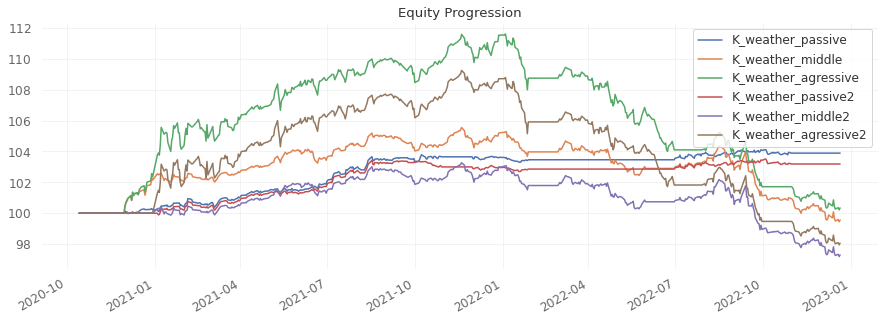

In [ ]:
ret.plot()

[Performance Metrics]

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2020-10-15  2020-10-15
End Period          2022-12-21  2022-12-21
Risk-Free Rate      0.0%        0.0%
Time in Market      87.0%       83.0%

Cumulative Return   -0.44%      0.34%
CAGR﹪              -0.2%       0.15%

Sharpe              -0.07       0.06
Prob. Sharpe Ratio  45.64%      53.42%
Sortino             -0.1        0.08
Sortino/√2          -0.07       0.06
Omega               0.99        0.99

Max Drawdown        -5.79%      -10.22%
Longest DD Days     394         350

Gain/Pain Ratio     -0.01       0.01
Gain/Pain (1M)      -0.05       0.04

Payoff Ratio        0.88        0.94
Profit Factor       0.99        1.01
Common Sense Ratio  0.94        0.92
CPC Index           0.44        0.51
Tail Ratio          0.95        0.91
Outlier Win Ratio   6.24        3.88
Outlier Loss Ratio  4.75        2.58

MTD                 -0.59%      -0.58%
3M            

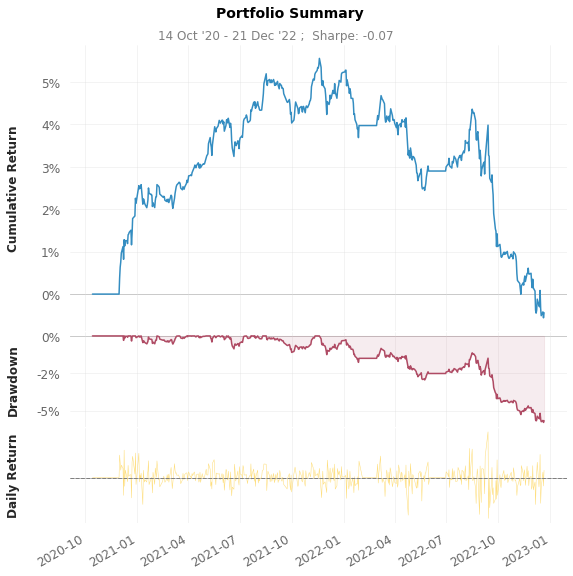

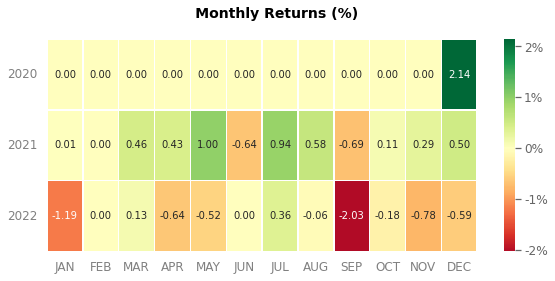

In [ ]:
qs.reports.basic(ret.prices['K_weather_middle'].to_returns().dropna(), ret.prices['K_weather_agressive'].to_returns().dropna())

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.8/dist-packages/matplotlib/pyplot.py'>

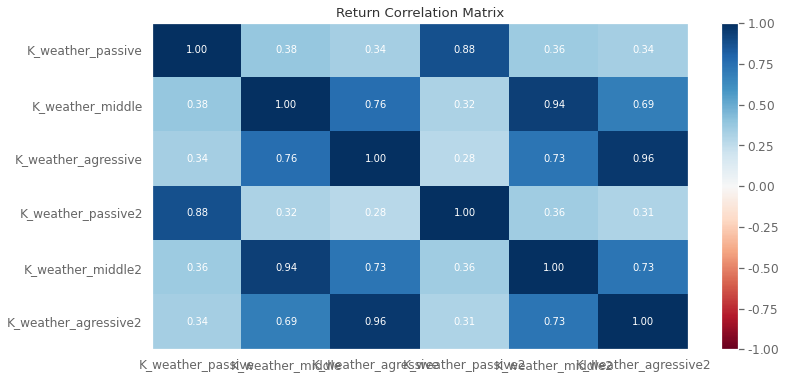

In [ ]:
ret.plot_correlation()

Text(0.5, 0.98, 'Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

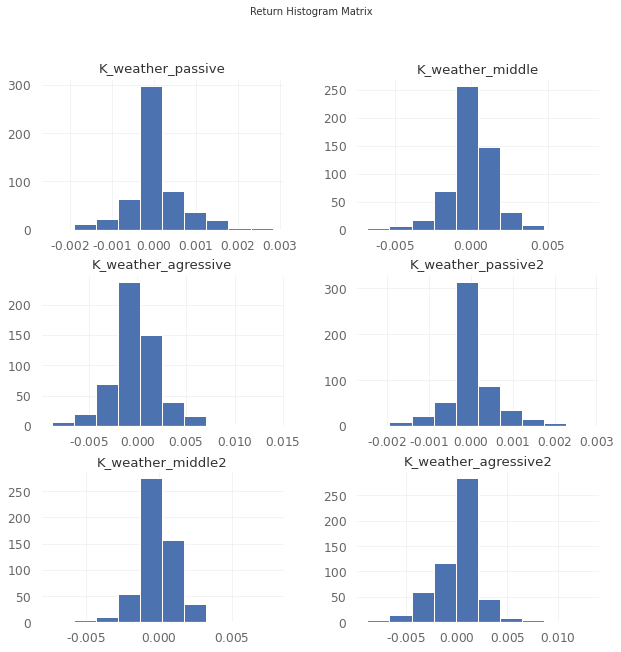

In [ ]:
ret.plot_histograms()

In [ ]:
ret['K_weather_passive'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0         0   0      0      0      0      0      0      0      0         0   0.21   0.21
  2021   0.31      0   0.47   0.44   0.04   0.42   0.96   0.59   0.06   0.11      0  -0.03   3.4
  2022  -0.15      0   0      0      0      0      0.36  -0.06   0.28  -0.17      0   0      0.27


In [ ]:
ret['K_weather_middle'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0         0   0      0      0      0      0      0      0      0      0      2.14   2.14
  2021   0.01      0   0.46   0.43   1     -0.64   0.94   0.58  -0.69   0.11   0.29   0.5    3.02
  2022  -1.19      0   0.13  -0.64  -0.52   0      0.36  -0.06  -2.03  -0.18  -0.78  -0.59  -5.38


In [ ]:
#@title
ret['K_weather_agressive'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  ------
  2020   0      0      0      0      0      0      0         0   0      0      0      2.35    2.35
  2021   1.75   0.69   1.15   0.83   1.2    0.34   0.29      1  -0.84   0.66   0.58   1.01    9
  2022  -2.51   0      0.13  -1.1   -1.01  -2.35   0         0  -2.29   0     -0.78  -0.58  -10.06


In [ ]:
ret['K_weather_passive2'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0      0      0      0      0         0   0      0
  2021   0.28   0.05   0.46   0.48   0.02   0.42   0.9    0.6    0.05  -0.29      0  -0.04   2.95
  2022  -0.09   0      0      0      0      0      0.33  -0.05   0.28  -0.23      0   0      0.23


In [ ]:
ret['K_weather_middle2'].display_monthly_returns()


  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0      0      0      0      0      0      0      0
  2021  -0.02   0.05   0.46   0.48   0.94  -0.61   0.9    0.6   -0.7    0.05   0.32   0.49   2.98
  2022  -1.16   0      0.12  -0.63  -0.54   0      0.33  -0.03  -2.07  -0.24  -0.81  -0.63  -5.53


In [ ]:
ret['K_weather_agressive2'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2020   0      0      0      0      0      0       0     0      0      0      0      0      0
  2021   1.72   0.74   1.15   0.94   1.13   0.4     0.3   1.09  -0.86   0.65   0.64   0.5    8.72
  2022  -2.58   0      0.12  -1.1   -0.52  -2.41    0     0.02  -2.34   0     -0.8   -0.62  -9.82
